# Títulos
Texto en grande que aparece (usualmente) encima del gráfico. 
- No debería contener más de 10 palabras. 
- Puede estar acompañado de un subtitulo si el gráfico necesita mas contexto. Tampoco debería tener más de 10 palabras. 
- Cada eje del gráfico también siempre tiene que estar acompañado por un título.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2016 = raw[(raw['anio'] == '2016') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2016[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 

# Pandas

Text(0, 0, 'Ventas (en Millones de Dólares)')

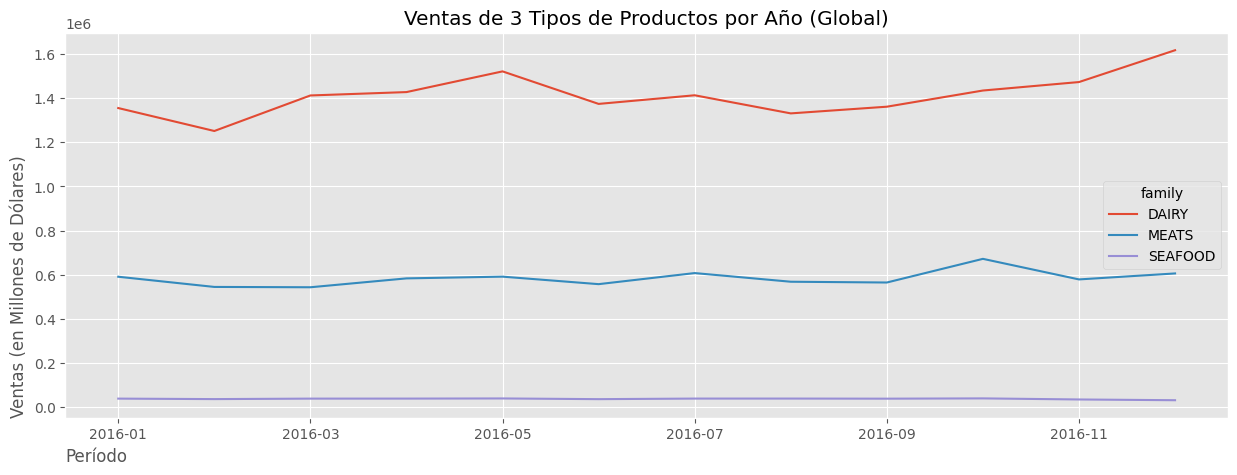

In [44]:
plt.style.use(
    'ggplot' 
)

# El metodo plot me retorna una referencia al objeto de mi gráfico
ax = df.plot.line(
    figsize=(15, 5),
    title='Ventas de 3 Tipos de Productos por Año' # TITULO en Pandas
)

# TITULO - Metodo Global: Funciona en Pandas, Matplotlib y Seaborn
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
plt.title('Ventas de 3 Tipos de Productos por Año (Global)')

# TITULOS DE EJES - Metodo Global: Funcioan en Pandas, Matplotlib y Seaborn
#plt.xlabel('xlabel')
#plt.ylabel('ylabel')

# TITULOS DE EJES 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_xlabel(
    'Período', 
    loc='left' # 'right', 'center' o 'left', para posicionar el texto: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html 
)
ax.set_ylabel(
    'Ventas (en Millones de Dólares)', 
    loc='bottom' # 'top', 'bottom' o 'center', para posicionar el texto: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
)

# Seaborn

[Text(0.5, 0, 'Período'),
 Text(0, 0.5, 'Ventas (en Millones de Dólares)'),
 Text(0.5, 1.0, 'Ventas de 3 Tipos de Productos por Año (Seaborn)')]

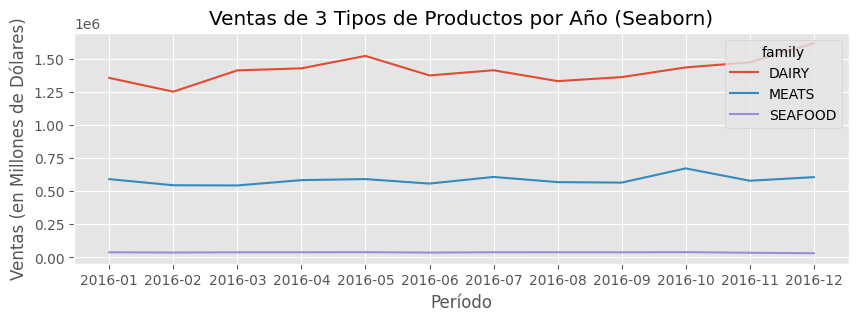

In [36]:
plt.figure(
    figsize=(10, 3)
)

# TITULO - Metodo Global: Funciona en Pandas, Matplotlib y Seaborn
plt.title('Ventas de 3 Tipos de Productos por Año')

# TITULOS DE EJES - Metodo Global: Funcioan en Pandas, Matplotlib y Seaborn
plt.xlabel('xlabel')
plt.ylabel('ylabel')

sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family'
).set(
    xlabel='Período', # TITULO DE EJES
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)' # TITULO 
)

# Plotly

In [45]:
fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    color='family',
    width=800, 
    height=300,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', # TITULO en Plotly: https://plotly.com/python/figure-labels/
    labels={ # TITULO DE EJES:
        "x": "Periodo",
        "sales": "Ventas por año (en millones de $)",
        "family": "Tipo de Producto"
    }
)

fig.show()